# Space Invaders Analysis - Deep-Q-learning

Authors: Nicolás Arrieta Larraza and Thuany Stuart

Date: 06/05/2021

## Introduction

---

This notebook is composed of 2 sections:

**A)** Analyzing the training results of the models with different values of gamma

**B)** Testing the trained models with different values of gamma

## A - Model comparison for several values of gamma

---

In this section we will analyze the training results of the final model for the following values of gamma:
* Gamma = 0.7
* Gamma = 0.99
* Gamma = 0.999

And we will compare them with the performance of a random agent


### Import Libraries

In [66]:
import numpy as np
import os
import sys
import random
import gym
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from numpy import genfromtxt

path = os.path.abspath('')
path

'/home/narrietal/Documents/University/AI/SpaceInvaders'

### Defining functions

Function to compute average of training models

In [209]:
def compute_models_average(models_rewards):
    window_size = 100
    models_moving_avg = []
    gammas = [0.7,0.99,0.999]
    
    for rewards in models_rewards:
        i = 0
        moving_averages = []

        while i < len(rewards) - window_size + 1:

            this_window = rewards[i : i + window_size]

            window_average = np.sum(this_window) / window_size

            moving_averages.append(window_average)

            i += 1
            
        models_moving_avg.append(moving_averages)
        
    
    fig=plt.figure(figsize=(20, 12))
    for i in range(len(models_rewards)):
      plt.subplot(2,2,i+1)
      plt.plot(range(len(moving_averages)), models_moving_avg[i],label=str(gammas[i]))
      plt.legend()
      plt.title('Moving average of model with gamma value {}'.format(str(gammas[i]))) 
      plt.xlabel('Episode')
      plt.ylabel('Average reward')
    plt.show() 

Function to compute average of randoma agent

In [205]:
def compute_random_agent_avg(rewards):
    window_size = 100
    
    i = 0
    moving_averages = []

    while i < len(rewards) - window_size + 1:

        this_window = rewards[i : i + window_size]

        window_average = np.sum(this_window) / window_size

        moving_averages.append(window_average)

        i += 1

    plt.plot(range(len(moving_averages)), moving_averages,label="random")
    plt.legend()
    plt.title('Moving average of model with random agent')
    plt.xlabel('Episode')
    plt.ylabel('Average reward')
    plt.show() 

Function to test agents

In [224]:
def test_agent(env, model, iterations):
    reward_per_ep = []
    for i in tqdm(range(iterations)):
        # Initialize state and variables
        observation = env.reset()
        done = False
        
        total_ep_reward = 0

        while not done:

            if model is not None:
                #predicting q values
                observation = observation.reshape(1, -1)/255
            
                q_list = model.predict(observation).flatten()

                # Choose the optimum policy, the one that maximizes the value
                action = np.argmax(q_list)
            else:
                action = env.action_space.sample()

            # Add step to the memory
            new_observation, reward, done, info = env.step(action)
            
            total_ep_reward += reward
            # Update state
            observation = new_observation
        
        reward_per_ep.append(total_ep_reward)
        
    env.close()
    return reward_per_ep

### Import training results

In [200]:
rewards_episode_gamma_07 = genfromtxt('./gamma_07/reward_per_episode_gamma_0_7.csv', delimiter=',')
rewards_episode_gamma_099 = genfromtxt('./gamma_099/reward_per_episode_gamma_0_99.csv', delimiter=',')
rewards_episode_gamma_0999 = genfromtxt('./gamma_0999/reward_per_episode_gamma_0_999.csv', delimiter=',')
models_rewards = [rewards_episode_gamma_07, rewards_episode_gamma_099, rewards_episode_gamma_0999]

### Obtaining rewards of random agent

Setting up GYM enviroment with Atari's game Space Invaders in RAM version and setting the same frameskipping as in training.

In [202]:
env = gym.make('SpaceInvaders-ram-v0', frameskip=3)
random_agent_rewards = test_agent(env, None, 600)

  0%|          | 0/600 [00:00<?, ?it/s]

### Visualizing results

First we show the average of the rewards per episode of the trained models

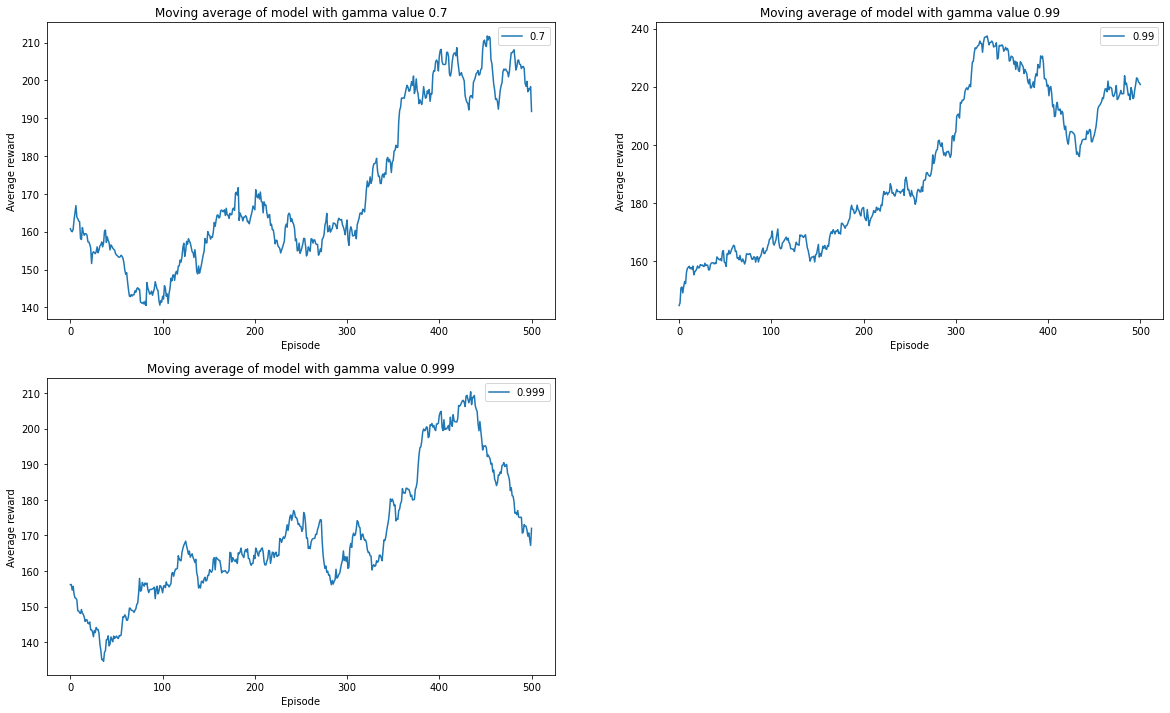

In [210]:
compute_models_average(models_rewards)

And below one can find the average of rewards per episode of the random agent

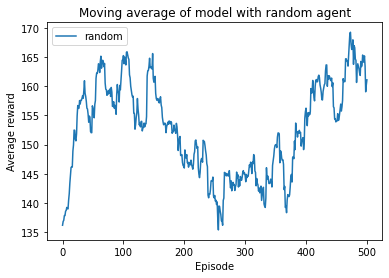

In [211]:
compute_random_agent_avg(random_agent_rewards)

We can observe that every trained model present an increment of the average in time which shows how the models are successfully learning. The curve, although noisy, shows an overall increment which is lacking in case of the random agent as we can see.

The average values between the trained models do not change drastically. However we can see an exponential with less fluctuations and higher values in case of the model with gamma 0.99.

## B - Testing the model for several values of gamma

---

In this section we will test the final model for the following values of gamma:

* Gamma = 0.7
* Gamma = 0.99
* Gamma = 0.999

### Importing models

In [212]:
model_07 = load_model('./gamma_07/model_9_gamma_0_7')
model_099 = load_model('./gamma_099/model_9_gamma_0_99')
model_0999 = load_model('./gamma_0999/model_9_gamma_0_999')

### Testing

In this section we will test the 3 trained models and compare its average values

In [225]:
model_07_test_rewards=test_agent(env, model_07, 5)

  0%|          | 0/5 [00:00<?, ?it/s]

In [229]:
print("Average reward: ",np.mean(model_07_test_rewards), 
      "\n Maximum reward: ", np.max(model_07_test_rewards),
      "\n Minimum reward: ", np.min(model_07_test_rewards))

Average reward:  32.0 
 Maximum reward:  50.0 
 Minimum reward:  10.0


In [227]:
model_099_test_rewards=test_agent(env, model_099, 5)

  0%|          | 0/5 [00:00<?, ?it/s]

In [230]:
print("Average reward: ",np.mean(model_099_test_rewards), 
      "\n Maximum reward: ", np.max(model_099_test_rewards),
      "\n Minimum reward: ", np.min(model_099_test_rewards))

Average reward:  168.0 
 Maximum reward:  370.0 
 Minimum reward:  50.0


In [228]:
model_0999_test_rewards=test_agent(env, model_0999, 5)

  0%|          | 0/5 [00:00<?, ?it/s]

In [231]:
print("Average reward: ",np.mean(model_0999_test_rewards), 
      "\n Maximum reward: ", np.max(model_0999_test_rewards),
      "\n Minimum reward: ", np.min(model_0999_test_rewards))

Average reward:  78.0 
 Maximum reward:  135.0 
 Minimum reward:  40.0


As we can observe, the model with best performance was clearly the model with gamma 0.99